## Regresión Lineal 

### Introducción

Los modelos de regresión son un objeto matemático que permiten estudiar la variación de una variable que llamaremos dependiente ( que corresponde a un vector n dimensional $\boldsymbol y$) de acuerdo a cambios presentados en un conjunto de variables que llamaremos independientes $ \boldsymbol X$, con $ \boldsymbol X \in M_{n*p}$ (siendo $n$ el tamaño de muestra y $p$ el número de covariables). De manera matricial, un modelo de regresión lineal puede ser escrito de la siguiente forma


$$ \boldsymbol Y = \boldsymbol X \beta + \boldsymbol \epsilon $$

donde $\beta \in M_{1*p}$ es el vector de parámetros y $ \boldsymbol \epsilon $ corresponde a una perturbación aleatoria que se asume distribuida de forma normal $n-variada$ con vector de medias $\boldsymbol \mu = \boldsymbol 0$ y matriz de covarianzas $\Sigma = \sigma^2 I$ con $I$ la matriz identidad de tamaño $n$. 

El análisis de regresión tiene 3 grandes enfoques. 


* Identificar covariables que tienen un impacto estadísticamente significativo sobre la respuesta
* Estimación 
* Predicción 

### Breve historia

La primera forma de regresión lineal documentada fue el método de los mínimos cuadrados que fue publicada por Legendre en 1805, Gauss publicó un trabajo en donde desarrollaba de manera más profunda el método de los mínimos cuadrados,1​ y en dónde se incluía una versión del teorema de Gauss-Márkov.

El término regresión se utilizó por primera vez en el estudio de variables antropométricas: al comparar la estatura de padres e hijos, donde resultó que los hijos cuyos padres tenían una estatura muy superior al valor medio, tendían a igualarse a este, mientras que aquellos cuyos padres eran muy bajos tendían a reducir su diferencia respecto a la estatura media; es decir, "regresaban" al promedio.2​ La constatación empírica de esta propiedad se vio reforzada más tarde con la justificación teórica de ese fenómeno.

El término lineal se emplea para distinguirlo del resto de técnicas de regresión, que emplean modelos basados en cualquier clase de función matemática. Los modelos lineales son una explicación simplificada de la realidad, mucho más ágiles y con un soporte teórico mucho más extenso por parte de la matemática y la estadística.

Pero bien, como se ha dicho, se puede usar el término lineal para distinguir modelos basados en cualquier clase de aplicación.


[[Fuente]]((https://es.wikipedia.org/wiki/Regresi%C3%B3n_lineal#Historia))

### Planteamiento del Algorítmo


Visto de manera matricial; como fue mostrado anteriormente, el modelo de regresión lineal es escrito como $ \boldsymbol Y =  \boldsymbol X \beta + \boldsymbol \epsilon$. Su estimación se puede llevar a traves de mínimos cuadrados, los cuales buscan el valor de $\beta$ que minimiza $$SC = \sum_{i=1}^{n}{e^2_i} = (\boldsymbol Y-\boldsymbol X \beta )^t(\boldsymbol Y-\boldsymbol X \beta)$$
donde $H = X(X^TX)^{-1}X^t$ se conoce como la matriz hat. Así, derivando la anterior expresión y despejando $\beta$ se obtiene $$\hat \beta = (X^tX)^{-1}X^tY$$
como la estimación vía mínimos cuadrados  del vector de parámetros $\beta$. 

De esta manera, los valores de $\boldsymbol Y$ ajustados están dados por $$ \hat Y = \boldsymbol X \hat \beta$$
 
Así, el vector de residuales estimados es $$\hat \epsilon = Y - \hat Y$$.

Para más detalles se invita al lector a consultar la siguiente fuente [[Fuente]]((https://global.oup.com/booksites/content/0199268010/samplesec3))

### Aplicación en Datos 


La marca manufacturera de autos Geely Auto desea entrar a competir en el mercado de Estados Unidos lanzando al mercado sus propios autos, considerando que el mercado Chino es muy diferente al mercado Americano se realiza un estudio de investigación de mercados y se contrata a una consultora automovilísta para entender qué factores impactan sobre el precio de los carros en el mercado de Americano. 

La meta de negocio consiste en identificar los factores que impactan estadísticamente sobre el precio de los autos y la magnitud del impacto, lo cuál permitirá manipular el diseño de los carros, crear estatégias de negocio, estratégias de publicidad, etc. 

La siguiente salida muestra una parte de la base a trabajar.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

cars = pd.read_csv('CarPrice_Assignment.csv')
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Veámos el número de columnas disponibles y el tamaño de muestra son 26 y 205, respectivamente. 

In [2]:
cars.shape

(205, 26)

Ahora, identifiquemos el nombre de todas las columnas presentes. Por simplicidad, para este ejercicio se eliminarán las covariables de tipo categórico y se procederá únicamente con las covariables cuantitativas. 

In [3]:
cars.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

La columnas seleccionadas a continuación corresponden a todas aquellas que son de naturaleza cuantitativa. 

In [4]:
cars = cars[['wheelbase','carlength', 'carwidth', 'carheight', 'curbweight', 
      'enginesize',  'boreratio', 'stroke', 'compressionratio', 'horsepower',
      'peakrpm', 'citympg', 'highwaympg','price']]
cars.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


Veámos ahora como se ve modificada la forma de la base datos una vez seleccionadas las columnas únicamente cuantitativas.

In [5]:
cars.shape

(205, 14)

Se estudiará ahora a traves de scatter plot si existe alguna relación lineal entre las covariables y la variable dependiente precio 

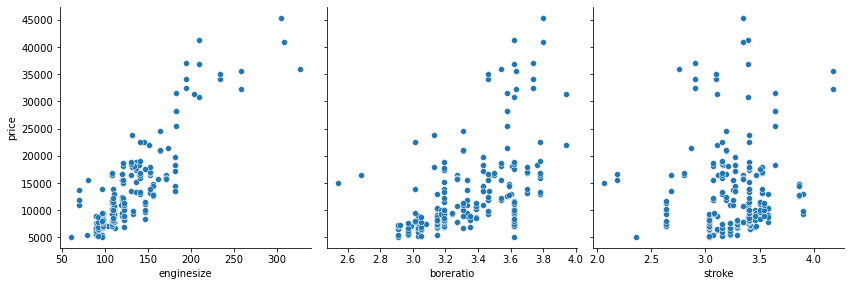

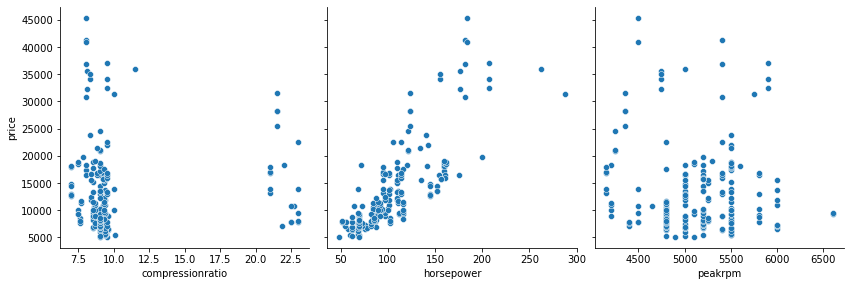

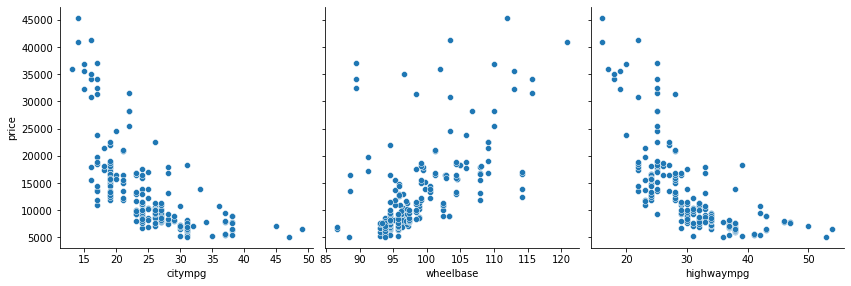

In [6]:
import warnings
warnings.filterwarnings('ignore')

def pp(x,y,z):
    sns.pairplot(cars, x_vars=[x,y,z], y_vars='price',height=4, aspect=1,diag_kind=None)
    plt.show()

pp('enginesize', 'boreratio', 'stroke')
pp('compressionratio', 'horsepower', 'peakrpm')
pp('citympg','wheelbase', 'highwaympg') 

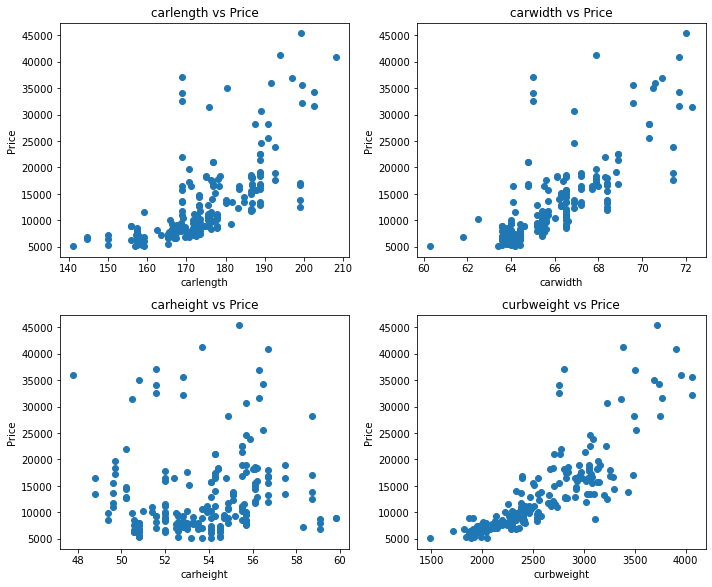

In [7]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(cars[x],cars['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('carlength', 1)
scatter('carwidth', 2)
scatter('carheight', 3)
scatter('curbweight', 4)

plt.tight_layout()

#### Resultados Análisis gráfico

De los anteriores scatter plot podemos ver que  las variables curbweight, carwidth, carlenght, wheelbase, citympg, enginesize, 
boreratio, horsepower y highwaympg tienen una relación aparentemente lineal con la variable dependiente precio. Para verificar esta premisa se ajustará un modelo de regresión lineal y se hará el respectivo análisis de inferencia, para este fin, se utiliza la librería sklearn. 

Los pasos a seguir corresponden a 

* Estandarizar la información
* Crear una base de entrenamiento y otra de prueba para verificar el poder predictivo 
* Realizar el ajuste del modelo 
* Interpretar las respectivas salidas

##### Partición y estandarización de la base de datos

In [20]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(cars, train_size = 0.7, test_size = 0.3, random_state = 100)

In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
columns = df_train.columns

df_train[columns] = scaler.fit_transform(df_train[columns])
y_train = df_train.pop('price')
X_train = df_train
df_train.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
122,0.244828,0.426016,0.291667,0.265487,0.272692,0.139623,0.230159,0.525253,0.15000,0.083333,0.551020,0.500000,0.567568
125,0.272414,0.452033,0.666667,0.212389,0.500388,0.339623,1.000000,0.464646,0.15625,0.395833,0.551020,0.166667,0.270270
166,0.272414,0.448780,0.308333,0.424779,0.314973,0.139623,0.444444,0.449495,0.15000,0.266667,1.000000,0.361111,0.324324
1,0.068966,0.450407,0.316667,0.088496,0.411171,0.260377,0.626984,0.247475,0.12500,0.262500,0.346939,0.222222,0.270270
199,0.610345,0.775610,0.575000,0.858407,0.647401,0.260377,0.746032,0.484848,0.03125,0.475000,0.387755,0.111111,0.135135


##### Ajuste del modelo

In [19]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, 10)
rfe = rfe.fit(X_train, y_train)

##### Print del ranking de cada atributo

In [22]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 2),
 ('carlength', True, 1),
 ('carwidth', True, 1),
 ('carheight', False, 4),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', False, 3),
 ('stroke', True, 1),
 ('compressionratio', True, 1),
 ('horsepower', True, 1),
 ('peakrpm', True, 1),
 ('citympg', True, 1),
 ('highwaympg', True, 1)]

Una vez identificados los atributos a conservar se modifica la base de entrenamiento 

In [23]:
X_train.columns[rfe.support_]

Index(['carlength', 'carwidth', 'curbweight', 'enginesize', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg'],
      dtype='object')

In [24]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,carlength,carwidth,curbweight,enginesize,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
122,0.426016,0.291667,0.272692,0.139623,0.525253,0.15000,0.083333,0.551020,0.500000,0.567568
125,0.452033,0.666667,0.500388,0.339623,0.464646,0.15625,0.395833,0.551020,0.166667,0.270270
166,0.448780,0.308333,0.314973,0.139623,0.449495,0.15000,0.266667,1.000000,0.361111,0.324324
1,0.450407,0.316667,0.411171,0.260377,0.247475,0.12500,0.262500,0.346939,0.222222,0.270270
199,0.775610,0.575000,0.647401,0.260377,0.484848,0.03125,0.475000,0.387755,0.111111,0.135135


Creación de funciones para el ajuste del modelo e identificación de multicolinealidad


In [25]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [26]:
X_train_new = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     69.60
Date:                Sat, 13 Mar 2021   Prob (F-statistic):           1.08e-47
Time:                        10:55:26   Log-Likelihood:                 148.24
No. Observations:                 143   AIC:                            -274.5
Df Residuals:                     132   BIC:                            -241.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1368      0.076  

##### Pulimiento del modelo

Nótese que "carlength","horsepower" y "citympg" tienen p-valor superior  a 0.05, por lo cual se retiran de la matriz de diseño y se vuelve a ejecutar el modelo. Este ejercicio se repetirá tantas veces como sea necesario. 

In [27]:
X_train_new = X_train_rfe.drop(["carlength","horsepower","citympg"], axis = 1)
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     97.59
Date:                Sat, 13 Mar 2021   Prob (F-statistic):           1.17e-49
Time:                        10:56:15   Log-Likelihood:                 145.77
No. Observations:                 143   AIC:                            -275.5
Df Residuals:                     135   BIC:                            -251.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1667      0.072  

In [28]:
X_train_new = X_train_rfe.drop(["carlength","horsepower","citympg","highwaympg","compressionratio","stroke"], axis = 1)
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     163.4
Date:                Sat, 13 Mar 2021   Prob (F-statistic):           2.60e-51
Time:                        10:56:42   Log-Likelihood:                 141.85
No. Observations:                 143   AIC:                            -273.7
Df Residuals:                     138   BIC:                            -258.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2268      0.028     -7.970      0.0

Dado que ya no se tienen covariables con p-valor mayor a 0.05 se detiene el pulimiento del modelo y se procede a identificar problemas de mulkticolinealidad

In [29]:
checkVIF(X_train_new)

,Features,VIF
0,const,13.88
2,curbweight,7.41
1,carwidth,4.29
3,enginesize,3.98
4,peakrpm,1.10


Al no tener valor del VIF superior a 10 se decide conservar la matriz de diseño resultante y se procede a imprimir los resultados de regresión del modelo final.

Text(0.5, 0, 'Errors')

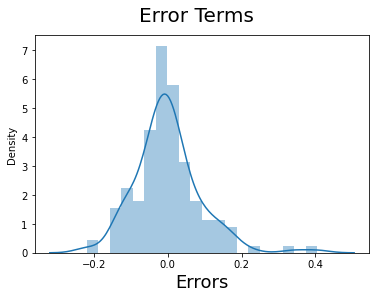

In [30]:
# Ajuste Final
lm = sm.OLS(y_train,X_train_new).fit()
y_train_price = lm.predict(X_train_new)

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

### Estudio del poder predictivo 

Para el estudio del poder predictivo del modelo se utilizará el conjunto de prueba previamente encontrado para esto se re-escalará el conjunto de datos como previamente se procedió con el conjunto de prueba y se dividirá la base en matriz de diseño y variable $y$ dependiente. 

In [31]:
# Escalamiento 
df_test[columns] = scaler.fit_transform(df_test[columns])

y_test = df_test.pop('price')
X_test = df_test

X_train_new = X_train_new.drop('const',axis=1)
X_test_new = X_test[X_train_new.columns]

# Adicionar intercepto 
X_test_new = sm.add_constant(X_test_new)

# Predicciones
y_pred = lm.predict(X_test_new)

In [32]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.7608049608921761

### Análisis Diagnóstico 

In [33]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     163.4
Date:                Sat, 13 Mar 2021   Prob (F-statistic):           2.60e-51
Time:                        10:57:52   Log-Likelihood:                 141.85
No. Observations:                 143   AIC:                            -273.7
Df Residuals:                     138   BIC:                            -258.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2268      0.028     -7.970      0.0

### Conclusiones 

* Las covariables carewidth, curbweight, enginesize y peakrpm tienen un efecto estadísticamente significativo sobre el precio de los automóviles, todas con un efecto positivo. 
* El modelo de regresión captura buena parte de la variación del fenómeno, con un $R^2 ajustado$ de 0.821
* De la prueba F se concluye que el modelo es mejor que el modelo nulo, con un p-valor menor a 0.05
* Es necesario revisar si las variables cualitativas mejoran el ajuste del modelo en cuanto al cumplimiento de los supiestos distribucionales de los residuales.